### Cleaning and Sorting

Here I tried inserting columns for Weak against and Strong against. But realized:
* It would be very cluttered
* It would take alot of iteration

Hene instead I just adjsuted my modified.csv

In [19]:
import pandas as pd
df = pd.read_csv('modified.csv')

In [20]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Strength
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,114
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,142
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,182
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,112
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,144


In [21]:
cols = list(df.columns)
df = df[cols[0:11] + cols[-1:] + cols[11:13]]

In [23]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Strength,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,114,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,142,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,182,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,112,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,144,1,False


In [32]:
df.to_csv('modified.csv')

In [44]:
df= df.drop(['Strong Agaisnt', 'Weak Against'], axis = 1)

In [45]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Strength,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,114,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,142,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,182,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,112,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,144,1,False


In [46]:
df.to_csv('modified.csv')

### Here we start messing around with some html reading functions.

Following the theme above, I thought it would be better to simply have a second DF with the type advantages listed. Perhaps ths would be more useful in the future, when I learn how to analyze data across multiple DFs.

In [122]:
html_url = "https://primagames.com/tips/pokemon-quest-type-advantage"

In [123]:
poketype_tables = pd.read_html(html_url)

In [124]:
len(poketype_tables)

2

In [125]:
df = pd.DataFrame(poketype_tables[0])

In [126]:
df.columns = df.iloc[0]

In [127]:
df = df.drop(0)

In [128]:
df.to_csv('type_advantage.csv', index = False)

In [149]:
df = pd.read_csv('type_advantage.csv')

In [150]:
df['SA Count'] = df['Strong Against'].apply(lambda x: len(str(x).split(' ')))

In [151]:
df['WA Count'] = df['Weak Against'].apply(lambda x: len(str(x).split(' ')))
df

,Type,Strong Against,Weak Against,SA Count,WA Count
0,Bug,"Dark, Grass, Psychic","Fairy, Fighting, Fire, Flying, Ghost, Poison, ...",3,7
1,Dark,"Ghost, Psychic","Dark, Fairy, Fighting",2,3
2,Dragon,Dragon,"Fairy, Steel",1,2
3,Electric,"Flying, Water","Electric, Dragon, Grass, Ground",2,4
4,Fairy,"Dark, Dragon, Fighting","Fire, Poison, Steel",3,3
5,Fighting,"Dark, Ice, Normal, Rock, Steel","Bug, Ghost, Fairy, Flying, Poison, Psychic",5,6
6,Fire,"Bug, Grass, Ice, Steel","Dragon, Fire, Rock, Water",4,4
7,Flying,"Bug, Fighting, Grass","Electric, Rock, Steel",3,3
8,Ghost,"Ghost, Psychic","Dark, Normal",2,2
9,Grass,"Ground, Rock, Water","Bug, Dragon, Fire, Flying, Grass, Poison, Steel",3,7


In [156]:
cols = list(df.columns)
df = df[cols[0:2] + [cols[3]] + [cols[2]]+ [cols[-1]]]

In [157]:
df

,Type,Strong Against,SA Count,Weak Against,WA Count
0,Bug,"Dark, Grass, Psychic",3,"Fairy, Fighting, Fire, Flying, Ghost, Poison, ...",7
1,Dark,"Ghost, Psychic",2,"Dark, Fairy, Fighting",3
2,Dragon,Dragon,1,"Fairy, Steel",2
3,Electric,"Flying, Water",2,"Electric, Dragon, Grass, Ground",4
4,Fairy,"Dark, Dragon, Fighting",3,"Fire, Poison, Steel",3
5,Fighting,"Dark, Ice, Normal, Rock, Steel",5,"Bug, Ghost, Fairy, Flying, Poison, Psychic",6
6,Fire,"Bug, Grass, Ice, Steel",4,"Dragon, Fire, Rock, Water",4
7,Flying,"Bug, Fighting, Grass",3,"Electric, Rock, Steel",3
8,Ghost,"Ghost, Psychic",2,"Dark, Normal",2
9,Grass,"Ground, Rock, Water",3,"Bug, Dragon, Fire, Flying, Grass, Poison, Steel",7


In [154]:
df.to_csv('type_advantage.csv')

### How many pokemon are of the Primary Colours? And how many have tails?

Now this is a terrible question, simply because my data set has no information on pokemon colours or tails what so ever. The person who asked this clearly did not even bother looking at the DataSet I posted.

But it's okay as it is not the question/answers that matter but the process I implement to generate the answer.

**Primary Colours**
* Red
* Blue
* Yellow

**Secondary Colours**
* Green
* Orange
* Purple

As for how I'm gonna answer these questions, I shall simply use the power of assumptions.

In [197]:
df = pd.read_csv('modified.csv')
df.head()

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Strength,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,114,1,False
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,142,1,False
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,182,1,False
3,3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,112,1,False
4,4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,144,1,False


Now it would be pretty safe to say that a Pokemon's primary type, **Type 1**, is what determines the majority of it's colour scheme. Ofcourse no pokemon is a solid shade of Red, but the primary colour scheme of 90% of fire pokemon would assumed to be Red.

Some assumptions:

* Grass and Bug = Green
* Fire = Red
* Water and Ice = Blue
* Electric = Yellow
* Psychic and Poison = Purple
* Ground, Rock = Brown
* Steel = Grey
* Dragon, Flying, Normal, Fighting, Fairy = ???

As you can see this is no easy task, let alone accounting for all the potential permutations of colours.



red blue yellow green grey black brown purple white pink, these are the 10 colours listed and sorted by pokemon on bulbapedia

In [179]:
mask = (df['Type 1'] == 'Dragon')| (df['Type 1'] =='Flying') | (df['Type 1'] =='Normal')| (df['Type 1'] =='Fighting')| (df['Type 1'] =='Fairy')

In [182]:
df[mask]['Type 1'].count()

166

In [195]:
amb = df[mask]['Type 1'].count() // 10

16 of these 'Ambigious' coloured pokemon shall go into each colour

### Red

In [230]:
mask = df['Type 1'] == 'Fire'
df[mask]['Type 1'].count()

48

#### Total

In [231]:
tred = df[mask]['Type 1'].count() + amb
tred

61

### Green

In [232]:
mask = (df['Type 1'] == 'Grass') | ( df['Type 1'] == 'Bug') 

In [233]:
df[mask]['Type 1'].count()

131

#### Total

In [234]:
tgreen = df[mask]['Type 1'].count() + amb
tgreen

144

### Blue

In [235]:
mask = (df['Type 1'] == 'Water') | ( df['Type 1'] == 'Ice') 

In [236]:
df[mask]['Type 1'].count()

130

#### Total

In [237]:
tblue = df[mask]['Type 1'].count() + amb
tblue

143

### Yellow

In [238]:
mask = df['Type 1'] == 'Electric'
df[mask]['Type 1'].count()

42

#### Total

In [240]:
tyellow = df[mask]['Type 1'].count() + amb
tyellow

55

### Purple

In [241]:
mask = (df['Type 1'] == 'Psychic') | ( df['Type 1'] == 'Poison')
df[mask]['Type 1'].count()

80

#### Total

In [242]:
tpurple = df[mask]['Type 1'].count() + amb
tpurple

93

In [243]:
c = {'total_red' : [tred], 'total_green': [tgreen], 'total_blue' : [tblue], 'total_yellow' :[tyellow], 'total_purple' : [tpurple] }
cdf = pd.DataFrame(data = c)

In [244]:
cdf

,total_red,total_green,total_blue,total_yellow,total_purple
0,61,144,143,55,93


In [245]:
import matplotlib.pyplot as plt

In [246]:
labels = cdf.columns

In [247]:
sizes = cdf.iloc[0]

(-1.111628524552386,
 1.104929647337195,
 -1.1101734604071016,
 1.1004844504955762)

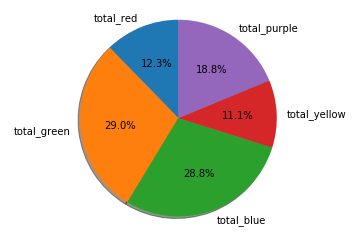

In [248]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

### Name a Blue Pokemon

In [249]:
df = pd.read_csv('modified.csv')
df.head()

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Strength,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,114,1,False
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,142,1,False
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,182,1,False
3,3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,112,1,False
4,4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,144,1,False


In [251]:
mask = (df['Type 1'] == 'Water') | ( df['Type 1'] == 'Ice') 
bdf = df[mask]

In [252]:
bdf.sample()

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Strength,Generation,Legendary
527,527,515,Panpour,Water,NaN,316,50,53,48,53,48,64,106,5,False
